In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Librerias de los modelos supervisados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

## Modelación aplicando balanceo de datos RandomUnderSampler

In [2]:
df = pd.read_csv("./dataset/predictive_maintenance_transform.csv")

In [3]:
data_0 = df[df["Estado del transformador"] == 0]
data_1 = df[df["Estado del transformador"] == 1]
data_0.shape, data_1.shape

((15066, 16), (807, 16))

In [4]:
# tomamos una muestra de 3000

data_0 = data_0.sample(n = int(3e+3))
data_0.shape

(3000, 16)

In [5]:
df = data_1.append(data_0)
df["Estado del transformador"].value_counts()

C:\Users\Victor\AppData\Local\Temp\ipykernel_6328\2724416060.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_1.append(data_0)


0    3000
1     807
Name: Estado del transformador, dtype: int64

In [6]:
df

,Ubicación,Potencia,Autoprotección,Promedio de DDT,Máximo de DDT,tasa de quema,Criticidad-Nivel Ceráunico,Conectores amobibles,Tipo de clientes,Número de usuarios,EENS,Tipo de instalación,Red Aérea,Cola de circuito,km de red BT,Estado del transformador
10,1,112.5,0,3.155602,6.6,0.00,0,1,1,39,1822.5,1,1,1,0.18860,1
61,1,112.5,0,3.155602,6.6,0.00,0,1,6,146,1822.5,3,1,0,0.34724,1
264,1,10.0,0,3.155602,6.6,0.00,0,1,3,2,162.0,2,1,0,0.26430,1
282,1,75.0,0,3.155602,6.6,0.00,0,1,1,76,1215.0,2,1,1,0.39051,1
348,1,75.0,1,3.155602,6.6,0.25,0,1,5,73,1215.0,1,1,1,0.61925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14031,0,15.0,0,5.259563,11.9,0.00,1,0,5,3,426.6,2,1,1,19029.00000,0
2356,0,10.0,0,1.039696,4.3,0.00,0,0,5,4,199.8,2,1,0,0.85531,0
7221,0,15.0,0,1.351333,6.1,0.00,1,0,5,9,415.8,2,1,1,0.66194,0
6304,0,15.0,0,0.734043,2.1,0.00,0,0,5,10,415.8,2,1,0,19274.00000,0


## División del Dataset: train-test

In [7]:

# Para la regresión

dt_features = df.drop(columns = ["Estado del transformador"] , axis=1)
dt_target = df["Estado del transformador"]
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size = 0.2, random_state = 42, stratify=dt_target)

#### Balanceo de datos

In [8]:

rus = RandomUnderSampler(random_state=42)

In [9]:
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [10]:
y_rus.value_counts()

0    645
1    645
Name: Estado del transformador, dtype: int64

#### Normalización de los datos

In [11]:
scaler = MinMaxScaler()
X_rus = scaler.fit_transform(X_rus)
X_test = scaler.transform(X_test)

In [12]:
y_test.value_counts()

0    600
1    162
Name: Estado del transformador, dtype: int64

# Modelos Supervisados, Clasificación binaria

## Modelo 1: Regresión Logística

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_rus, y_rus)

LogisticRegression()

### Evaluación

In [14]:
y_pred_lr = log_reg.predict(X_test)

In [15]:
lr_train = round(log_reg.score(X_rus,y_rus)*100, 2)
lr_accuracy = round(accuracy_score(y_test, y_pred_lr)*100, 2)

print("Accuracy del entrenamiento :",lr_train, "%")
print("Accuracy del modelo :",lr_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 71.16 %
Accuracy del modelo : 82.81 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       600
           1       0.59      0.60      0.60       162

    accuracy                           0.83       762
   macro avg       0.74      0.75      0.74       762
weighted avg       0.83      0.83      0.83       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


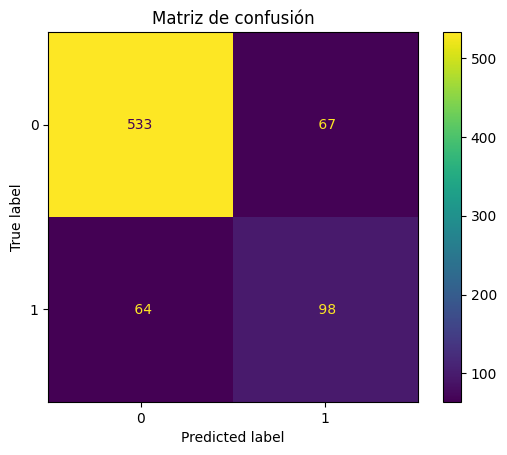

In [16]:
im_lr = plot_confusion_matrix(log_reg, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 2: Árbol de decision

In [17]:
tree = DecisionTreeClassifier()
tree.fit(X_rus, y_rus)

DecisionTreeClassifier()

### evaluación

In [18]:
y_pred_dt = tree.predict(X_test)

In [19]:
dt_train = round(tree.score(X_rus,y_rus)*100, 2)
dt_accuracy = round(accuracy_score(y_test, y_pred_dt)*100, 2)

print("Accuracy del entrenamiento :",dt_train, "%")
print("Accuracy del modelo :",dt_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_dt))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 100.0 %
Accuracy del modelo : 66.67 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.90      0.65      0.75       600
           1       0.36      0.74      0.49       162

    accuracy                           0.67       762
   macro avg       0.63      0.69      0.62       762
weighted avg       0.79      0.67      0.70       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


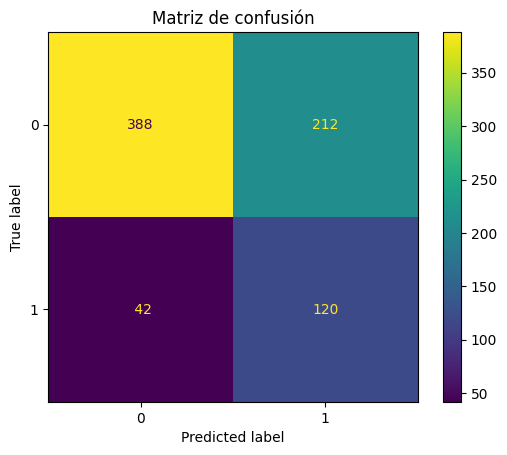

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(tree, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 3: Bosques aleatorios

In [21]:
ran_for = RandomForestClassifier(n_estimators=200, criterion='gini', max_features='sqrt', max_depth=20)
ran_for.fit(X_rus, y_rus)

RandomForestClassifier(max_depth=20, n_estimators=200)

### Evaluación

In [22]:
y_pred_rf =ran_for.predict(X_test)

In [23]:
rf_train = round(ran_for.score(X_rus,y_rus)*100, 2)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf)*100, 2)

print("Accuracy del entrenamiento :",rf_train, "%")
print("Accuracy del modelo :",rf_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 100.0 %
Accuracy del modelo : 77.3 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       600
           1       0.48      0.71      0.57       162

    accuracy                           0.77       762
   macro avg       0.69      0.75      0.71       762
weighted avg       0.82      0.77      0.79       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


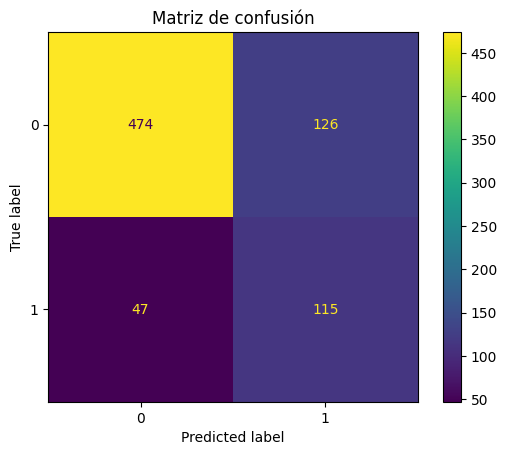

In [24]:
plot_confusion_matrix(ran_for, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 4: Máquina de Vectores de Soporte

In [25]:
svc = SVC(kernel='linear', gamma='auto',C=0.5)
svc.fit(X_rus, y_rus)

SVC(C=0.5, gamma='auto', kernel='linear')

### Evaluación

In [26]:
y_pred_svc = svc.predict(X_test)

In [27]:
svc_train = round(ran_for.score(X_rus,y_rus)*100, 2)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100, 2)

print("Accuracy del entrenamiento :",svc_train, "%")
print("Accuracy del modelo :",svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 100.0 %
Accuracy del modelo : 84.51 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       600
           1       0.68      0.52      0.59       162

    accuracy                           0.85       762
   macro avg       0.78      0.73      0.75       762
weighted avg       0.84      0.85      0.84       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


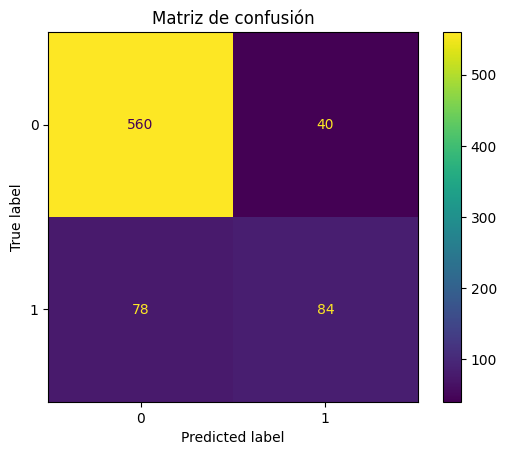

In [28]:
plot_confusion_matrix(svc, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 5: K-vecinos cercanos

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_rus, y_rus)

KNeighborsClassifier(n_neighbors=3)

### Evaluación

In [30]:
y_pred_knn = knn.predict(X_test)

In [31]:
knn_train = round(knn.score(X_rus,y_rus)*100, 2)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100, 2)

print("Accuracy del entrenamiento :",knn_train, "%")
print("Accuracy del modelo :",knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 82.25 %
Accuracy del modelo : 66.93 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       600
           1       0.36      0.71      0.48       162

    accuracy                           0.67       762
   macro avg       0.63      0.68      0.62       762
weighted avg       0.78      0.67      0.70       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


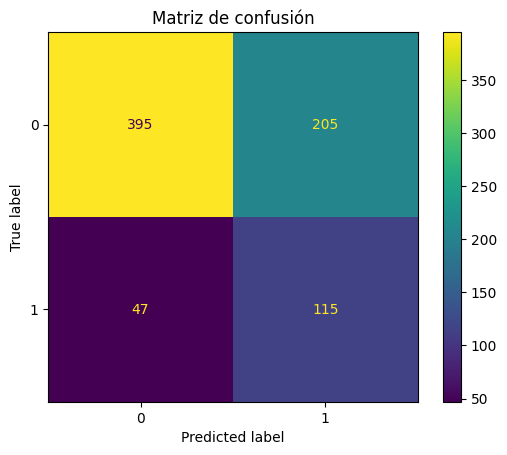

In [32]:
plot_confusion_matrix(knn, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()